# Tutorial I: Introduction to PyTorch (torch)
<p>
AICP, 2024<br>
Prepared by Mykhailo Vladymyrov and Matthew Vowels.
</p>

This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In this tutorial session we will get familiar wtih:
* How to do optimization in torch and what possibilities does that open to data science
* how to apply that to virtually any practical problem



torch provides a high-level interface, allowing easy implementation.

While it is easy to use, some fundamental conceps can remain a bit obscured, but we will try to clarify that in the course.

## 00. Requirements

To run this notebooks you need torch and numpy installed.
As some parts of this tutorial rely on specific functions, it's strongly advised to use the Chrome browser or Chromium derivatives.

Basic knowledge of Python can be acquired [here](https://docs.python.org/3/tutorial/) and of Numpy [here](https://docs.scipy.org/doc/numpy/user/quickstart.html).

To recall and practice the basics of Python check out this [Python Sheet](https://colab.research.google.com/github/neworldemancer/DSF5/blob/master/Python_key_points_homework.ipynb).

To learn python in-depth follow the Python Essentials [1](https://pythoninstitute.org/python-essentials-1), [2](https://pythoninstitute.org/python-essentials-2).

Full documentation on torch functions is available in the [reference](https://pytorch.org/docs/stable/index.html).


## 0. Cell execution

> Indented block
Press ``Ctrl+Enter`` or ``Shift+Enter`` on the next cell to execute the content


In [1]:
print('It works!')

It works!


Navigate between cells with arrows. Press `Enter` to edit cell, `Esc` to exit.

## 1. Load necessary libraries

In [2]:
import os
import sys
import tarfile
import requests

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


## 2. Create our first model

The model is defined as a class that inherits from `torch.nn.Module`.
Class deinition is like a recipe for creating an object.

Two methods (i.e. functions belongign to the object of the class) must be defined.
- `__init__` - called when the object is created
- `forward` - called when the model is used, i.e. some data is inputed to the model.

Here we will look at the simple model that takes a single input `x`  and outputs a single value equal to `x*(x+2)`

In [5]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()  # call __init__ method of the parent class nn.Module

    def forward(self, x):
        out1 = x + 2
        return x * out1

# Create an instance of the model
model = SimpleModel()

# Example of using the model with dummy input
input_tensor = torch.tensor(1.0)  # Example input
output = model(input_tensor)

print(output)

tensor(3.)


## 3. Run the model


In [4]:
out_res = model(torch.tensor(5.0))
print(out_res)


tensor(35.)


In [5]:
type(out_res)

torch.Tensor

Several values can be computed at the same time:

In [6]:
out_val = model(torch.tensor([1, 2, 1]))
print(out_val)

tensor([3, 8, 3])


## 4. Tensor operations

For ML tasks we often need to perform operations on high-dimensional data. Theese are represented as tensors in torch. For example we can calculate sum of squared values in an 1D array with 5 elements:

In [7]:
class SimpleModel2(nn.Module):
    def __init__(self):
        super(SimpleModel2, self).__init__()

    def forward(self, x):
        out1 = x + 2
        return torch.sum(out1)


model2 = SimpleModel2()
out_val = model2(torch.tensor([1, 2, 1]))
print(out_val)

tensor(10)


Or we can do the same for several 1D arrays at once:

In [8]:
class SimpleModel3(nn.Module):
    def __init__(self):
        super(SimpleModel3, self).__init__()

    def forward(self, x):
        out1 = x + 2
        return torch.sum(out1, axis=1)


model3 = SimpleModel3()
array = torch.tensor([[1,2,1],[1,2,1],[2,1,2],[2,1,2]])
print('input shape:', array.shape)

out_vals = model3(array)
print('output shape:', out_vals.shape)
print('output:', out_vals)

input shape: torch.Size([4, 3])
output shape: torch.Size([4])
output: tensor([10, 10, 11, 11])


## 5. Exercise 1

Reading the documentation of the function is always helpful. Also don't hesitate to use ChatGPT etc. to find the answer, but try to understand it.

In [9]:
torch.sum?

Docstring:
sum(input, *, dtype=None) -> Tensor

Returns the sum of all elements in the :attr:`input` tensor.

Args:
    input (Tensor): the input tensor.

Keyword args:
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        If specified, the input tensor is casted to :attr:`dtype` before the operation
        is performed. This is useful for preventing data type overflows. Default: None.

Example::

    >>> a = torch.randn(1, 3)
    >>> a
    tensor([[ 0.1133, -0.9567,  0.2958]])
    >>> torch.sum(a)
    tensor(-0.5475)

.. function:: sum(input, dim, keepdim=False, *, dtype=None) -> Tensor
   :noindex:

Returns the sum of each row of the :attr:`input` tensor in the given
dimension :attr:`dim`. If :attr:`dim` is a list of dimensions,
reduce over all of them.


If :attr:`keepdim` is ``True``, the output tensor is of the same size
as :attr:`input` except in the dimension(s) :attr:`dim` where it is of size 1.
Otherwise, :attr:`dim` is squeezed (see :f

Modify the code bellow to calculate mean of array's elements.

In [10]:
class MeanModel(nn.Module):
    def __init__(self):
        super(MeanModel, self).__init__()

    def forward(self, x):
        return  ???

# define data:
arr = torch.tensor([[1,2,3,4,5], [2,3,4,5.1,6], [25,65,12,12,11]])

model = ???  # define model
result = ???  # run model

print(result)

SyntaxError: invalid syntax (2094194441.py, line 6)

## 6. Getting the data

Use the Phyphox app, acceleration without g.

Press play, then perform some actions: e.g. jump. press stop
export data as csv, share e.g. by email with youself.

Do the same with the two ather actions, progressively increasing the action's speed.

Download the files, uzip, and rename each of the three `Raw Data.csv` to `activity_1.csv`, `activity_2.csv`, `activity_3.csv`. 

Place the files in the directory `'data_accelerometer'` next to the notebooks.

(15 min exercise)

In [12]:
import pandas as pd
import seaborn as sns

In [13]:
# read data fromthe folder data_accelerometer/ into three dataframes:

df_1 = pd.read_csv('data_accelerometer/activity_1.csv')
df_2 = pd.read_csv('data_accelerometer/activity_2.csv')
df_3 = pd.read_csv('data_accelerometer/activity_3.csv')


In [16]:
df_1

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.018897,0.357646,-0.755297,-1.480146,1.699770
1,0.021392,0.415696,-0.810347,-1.193196,1.501060
2,0.023887,0.452036,-0.841081,-1.025173,1.400976
3,0.026382,0.516069,-0.934082,-0.831066,1.352592
4,0.028877,0.611472,-1.005048,-0.758028,1.399510
...,...,...,...,...,...
2124,5.318418,0.246917,0.163920,-0.714157,0.773213
2125,5.320913,0.278622,0.195456,-0.749492,0.823147
2126,5.323408,0.284481,0.177250,-0.779868,0.848847
2127,5.325903,0.311065,0.162947,-0.811440,0.884165


In [17]:
df_1.columns

Index(['Time (s)', 'Linear Acceleration x (m/s^2)',
       'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)',
       'Absolute acceleration (m/s^2)'],
      dtype='object')

<Axes: xlabel='Time (s)', ylabel='Absolute acceleration (m/s^2)'>

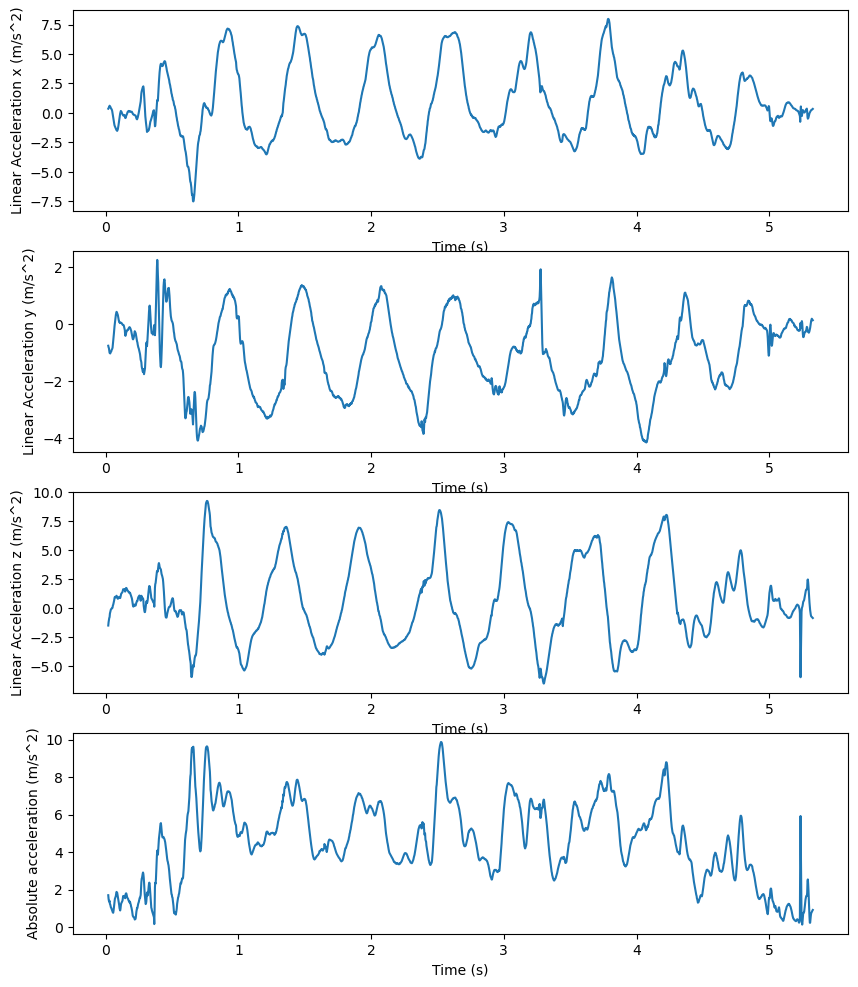

In [26]:
# plot the data from the first dataframe in three subplots for each axis with seaborn

fig, axs = plt.subplots(4, 1, figsize=(10, 12))
sns.lineplot(data=df_1, x='Time (s)', y='Linear Acceleration x (m/s^2)', ax=axs[0])
sns.lineplot(data=df_1, x='Time (s)', y='Linear Acceleration y (m/s^2)', ax=axs[1])
sns.lineplot(data=df_1, x='Time (s)', y='Linear Acceleration z (m/s^2)', ax=axs[2])
sns.lineplot(data=df_1, x='Time (s)', y='Absolute acceleration (m/s^2)', ax=axs[3])


In [18]:
def preprocess_data(df, intensity_level):
    # copy the dataframe to keep the original data intact
    df = df.copy()
    
    # add column with intensity level
    df['intensity_level'] = intensity_level
    
    # pairs of old and new names are defined in the dictionary
    # In a dictionary, unique keys point to some elements

    df.rename(columns={'Time (s)': 't',
                       'Linear Acceleration x (m/s^2)' : 'x',
                       'Linear Acceleration y (m/s^2)': 'y',
                       'Linear Acceleration z (m/s^2)': 'z',
                       'Absolute acceleration (m/s^2)': 'abs'
                       }, inplace=True)  # rename first column
    
    # drop first column
    df.drop(columns=['t'], inplace=True)

    # drop first and last 15% of the rows
    n_rows = df.shape[0]
    n_rows_to_drop = int(n_rows * 0.15)
    df = df.iloc[n_rows_to_drop:-n_rows_to_drop]  # take range of rows from n_rows_to_drop to last n_rows_to_drop

    return df

In [19]:
df_preprocessed_1 = preprocess_data(df_1, 1)
df_preprocessed_2 = preprocess_data(df_2, 2)
df_preprocessed_3 = preprocess_data(df_3, 3)

In [20]:
df_preprocessed_1

,x,y,z,abs,intensity_level
319,1.393380,-0.738980,6.098568,6.299217,1
320,1.765560,-0.717150,6.057996,6.350655,1
321,2.138441,-0.713352,6.012408,6.421125,1
322,2.466262,-0.683577,6.012136,6.534179,1
323,2.844791,-0.655850,5.880764,6.565543,1
...,...,...,...,...,...
1805,-1.266817,-0.955516,-2.436291,2.907464,1
1806,-1.329542,-0.993884,-2.448684,2.958301,1
1807,-1.374546,-1.049038,-2.498934,3.038837,1
1808,-1.444219,-1.105385,-2.450867,3.051949,1


In [27]:
# concatenate the dataframes into one
df = pd.concat([df_preprocessed_1, df_preprocessed_2, df_preprocessed_3], axis=0)

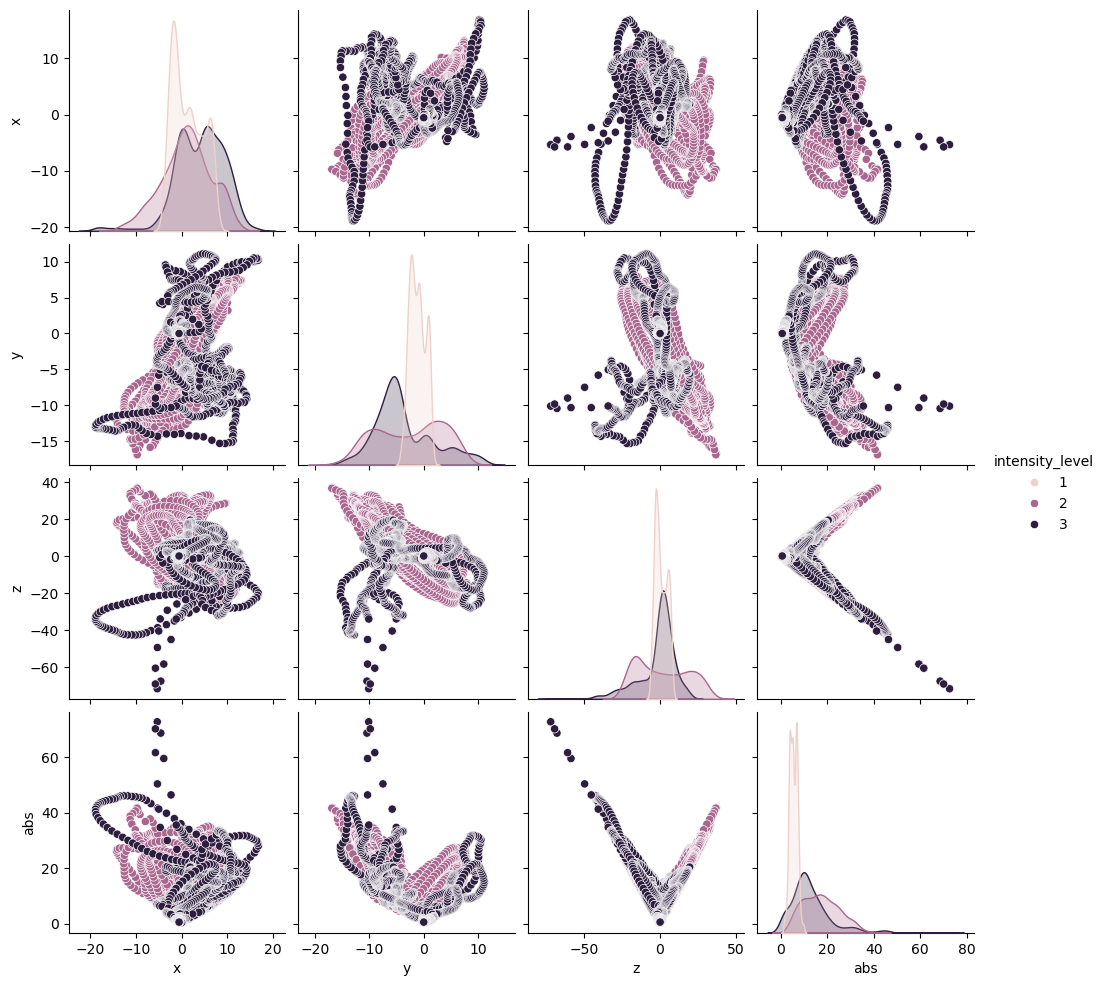

In [28]:
# visualize the data with pairplots, where hue according to the intensity level
#  The pairplot shows distribution of each columns' values on the diagonal,
#  and a scatterplot of the two columns on the off-diagonal
sns.pairplot(df, hue='intensity_level')

In [ ]:

X = df[['x', 'y', 'z', 'abs']]
y = df['intensity_level']

In [79]:
X

,x,y,z,abs
319,1.393380,-0.738980,6.098568,6.299217
320,1.765560,-0.717150,6.057996,6.350655
321,2.138441,-0.713352,6.012408,6.421125
322,2.466262,-0.683577,6.012136,6.534179
323,2.844791,-0.655850,5.880764,6.565543
...,...,...,...,...
1755,-0.587034,-0.106422,-0.063941,0.600020
1756,-0.571911,-0.080832,-0.007481,0.577644
1757,-0.562829,-0.075183,0.022907,0.568290
1758,-0.567145,-0.028566,0.074728,0.572760


In [82]:
x_arr = X.to_numpy()
y_arr = y.to_numpy()

print(f'x_arr shape: {x_arr.shape} type: {x_arr.dtype}')
print(f'y_arr shape: {y_arr.shape} type: {y_arr.dtype}')

x_arr shape: (4292, 4) type: float64
y_arr shape: (4292,) type: int64


In [83]:
x_arr

array([[ 1.39338005e+00, -7.38979816e-01,  6.09856796e+00,
         6.29921664e+00],
       [ 1.76556015e+00, -7.17150211e-01,  6.05799580e+00,
         6.35065509e+00],
       [ 2.13844109e+00, -7.13351727e-01,  6.01240778e+00,
         6.42112516e+00],
       ...,
       [-5.62828541e-01, -7.51829147e-02,  2.29067802e-02,
         5.68289678e-01],
       [-5.67144871e-01, -2.85663605e-02,  7.47282505e-02,
         5.72759682e-01],
       [-5.59723616e-01, -4.25434112e-03,  9.02225971e-02,
         5.66964498e-01]])

In [84]:
y_arr

array([1, 1, 1, ..., 3, 3, 3])

In [86]:
x_arr = X.to_numpy().astype(np.float32)
y_arr = y.to_numpy().astype(np.float32)

print(f'x_arr shape: {x_arr.shape} type: {x_arr.dtype}')
print(f'y_arr shape: {y_arr.shape} type: {y_arr.dtype}')

x_arr shape: (4292, 4) type: float32
y_arr shape: (4292,) type: float32


In [87]:
x_arr = X.to_numpy().astype(np.float32)
y_arr = y.to_numpy().astype(np.float32).reshape(-1, 1)

print(f'x_arr shape: {x_arr.shape} type: {x_arr.dtype}')
print(f'y_arr shape: {y_arr.shape} type: {y_arr.dtype}')

x_arr shape: (4292, 4) type: float32
y_arr shape: (4292, 1) type: float32


We will now train a linear regression model on this dataset.
This is a simplest model. The `y` (movement intensity) is modeled as linear combinations of the sample features, i.e. the x, y, z, and the absolute acceleration values.

In [102]:
# train a sklearn linear regression model on the data

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


x_train, x_val, y_train, y_val = train_test_split(x_arr, y_arr, test_size=0.2)

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [114]:
# evaluate model:

y_pred_train = model.predict(x_train)


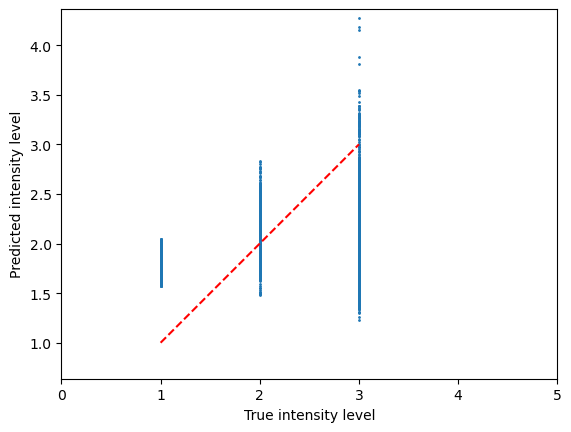

In [117]:

# plot predictions vs true values, equal axis scale (aspect='equal')
plt.scatter(y_train, y_pred_train, s=1)
plt.plot([1, 3], [1, 3], 'r--')
plt.axis('equal')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('True intensity level')
plt.ylabel('Predicted intensity level')
plt.show()
plt.close()

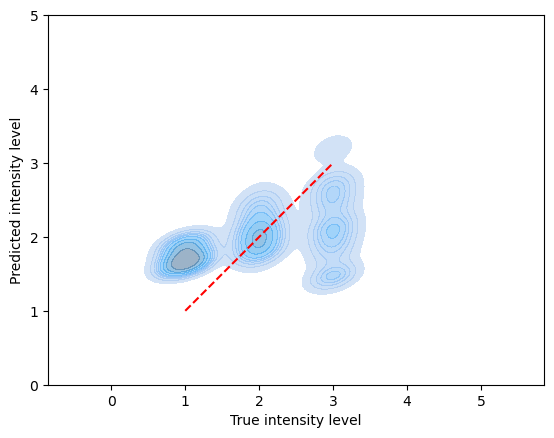

In [118]:
# plot the same data with seaborn kdeplot

sns.kdeplot(x=y_train.flatten(), y=y_pred_train.flatten(), fill=True, alpha=0.5)
plt.plot([1, 3], [1, 3], 'r--')
plt.axis('equal')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('True intensity level')
plt.ylabel('Predicted intensity level')
plt.show()
plt.close()


### Exercise (20 min)

Extend the study above, to include evaluation of the model on the validation data:

1. Why is it important to evaluate the model on the validation data?
2. What do we have to do?
3. How do we do that in python?

....

4. What do we observe?

## 7. Do the same with a neural network

Tomorow we will look in details what is a neural network, and how is it trained. Today we focus on big picture and loading the data.

In [119]:
# create torch model. feel free to skip this cell

class TwoLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

# Example usage:
input_size = 4
hidden_size = 16
output_size = 1

model = TwoLayerNN(input_size, hidden_size, output_size)
print(model)


TwoLayerNN(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=16, out_features=1, bias=True)
)


In [120]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# Assuming x_array and y_array are NumPy arrays or lists
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# create torch dataset for x and y
dataset_train = TensorDataset(x_train_tensor, y_train_tensor)
dataset_val = TensorDataset(x_val_tensor, y_val_tensor)


# create dataloaders
train_loader = DataLoader(dataset_train, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset_val, batch_size=32, shuffle=False, drop_last=False)



In [121]:
len(dataset_train), len(dataset_val)

(3433, 859)

In [125]:
# create model
model = TwoLayerNN(input_size, hidden_size, output_size)


# create optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# create loss function
loss_fn = torch.nn.MSELoss()

In [127]:

# train the model. Tomorrows lecture and tutorial will cover this in more detail.
for epoch in range(1000):
    model.train()
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred_val = model(x_batch)
        loss = loss_fn(y_pred_val, y_batch)
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
        train_loss = sum(loss_fn(model(x_batch), y_batch).item() for x_batch, y_batch in train_loader) / len(train_loader)
        val_loss = sum(loss_fn(model(x_batch), y_batch).item() for x_batch, y_batch in val_loader) / len(val_loader)
    
    
    print(f"Epoch {epoch}, train_loss: {train_loss}, val_loss: {val_loss}")


Epoch 0, train_loss: 1.1399961604136173, val_loss: 1.104516671763526
Epoch 1, train_loss: 0.9155554994244441, val_loss: 0.8800313594164672
Epoch 2, train_loss: 0.7508955110456342, val_loss: 0.7188386012006689
Epoch 3, train_loss: 0.5961744700358292, val_loss: 0.5739667503922073
Epoch 4, train_loss: 0.47802461238107946, val_loss: 0.45884244088773374
Epoch 5, train_loss: 0.41464780090011166, val_loss: 0.4022567007276747
Epoch 6, train_loss: 0.37534439396635394, val_loss: 0.37374936044216156
Epoch 7, train_loss: 0.35042108637150204, val_loss: 0.3477360236423987
Epoch 8, train_loss: 0.3301811978638729, val_loss: 0.330851376608566
Epoch 9, train_loss: 0.31342278615893604, val_loss: 0.3154283535701257
Epoch 10, train_loss: 0.30310465952503346, val_loss: 0.3085576858785417
Epoch 11, train_loss: 0.2973180785078869, val_loss: 0.29810175354833957
Epoch 12, train_loss: 0.2803767822752489, val_loss: 0.28709785640239716
Epoch 13, train_loss: 0.27136446953376875, val_loss: 0.27592569755183327
Epoch 

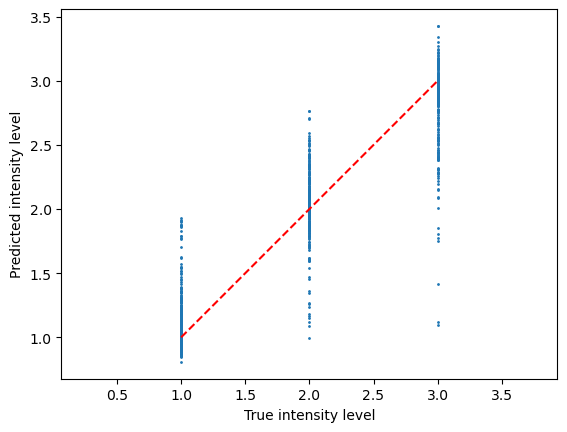

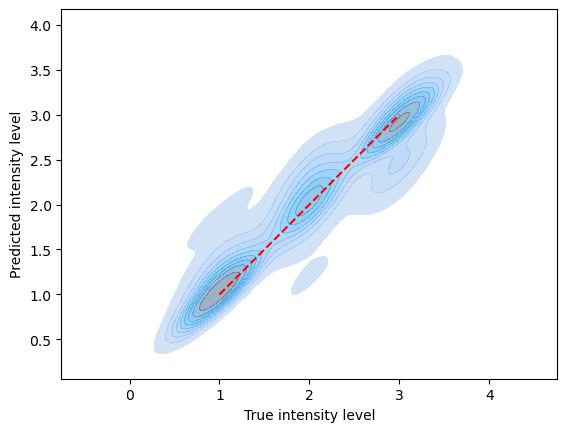

In [128]:
# plot predictions vs true values, equal axis scale (aspect='equal')
model.eval()
y_pred_val = model(x_val_tensor).detach().numpy()
plt.scatter(y_val.flatten(), y_pred_val, s=1)

plt.plot([1, 3], [1, 3], 'r--')
plt.axis('equal')
plt.xlabel('True intensity level')
plt.ylabel('Predicted intensity level')
plt.show()
plt.close()

# plot the same data with seaborn kdeplot

# Plots a scatter plot of the predicted intensity levels against the true intensity levels,
# with a 45-degree line indicating perfect prediction. 
# Also plots a kernel density estimation (KDE) plot of the same data 
# to visualize the distribution of the predictions. 
# The scatter plot uses equal axis scaling to ensure the aspect ratio is preserved,
#  making it easier to visually assess the accuracy of the predictions.
# The KDE plot provides a better view of the distribution of the predictions compared to the true values.

sns.kdeplot(x=y_val.flatten(), y=y_pred_val.flatten(), fill=True, alpha=0.5)
plt.plot([1, 3], [1, 3], 'r--')
plt.axis('equal')
plt.xlabel('True intensity level')
plt.ylabel('Predicted intensity level')
plt.show()
plt.close()

### Exercise (20 min) 

Save the trainnig and validation loss at each training epoch and plot their evolution.


### Exercise (20 min) 

Explain, what did we do

Today we have briefly looked at the data, and how to fit a regression model.

In the next session, we will look what is inside of the neural network, how are they built and trained.
We will also look not only into what are they predicting, but also - what do they learn.